In [1]:
from dbo.simulator.TestFunctions import *
from dbo.acquisition.DEI import DiverseExpectedImprovement
from dbo.tester.Tester import *
from dbo.metrics.ExperimentMetric import *
from botorch.acquisition import ExpectedImprovement
from dbo.plotter.Plotter import *

/Users/bennysun/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test = Tester(5, 20, 10)
simulator_list = [Branin2DSimulator(), Griewank2DSimulator(), 
                  SixHumpCamel2DSimulator(), HolderTable2DSimulator(),  Gramacy2DSimulator()]

acquisition_list = [(DiverseExpectedImprovement, {'lambda_':1, 'epsilon_':0.1}), 
                    (ExpectedImprovement, {"maximize":False})]

experiment_list = test.perform_known_experiment(25, simulator_list, acquisition_list)

In [3]:
experiment_metric = ExperimentMetrics()
df = experiment_metric.get_dataframe(experiment_list, 0.4)
df

,sim,acqf,num_sol,curr_min,avg_dist,num_cluster,trial
0,Branin2DSimulator,DiverseExpectedImprovement,13,0.426481,8.313772,3,1
1,Branin2DSimulator,ExpectedImprovement,27,0.399555,0.655929,2,1
2,Griewank2DSimulator,DiverseExpectedImprovement,37,0.007749,6.203831,3,1
3,Griewank2DSimulator,ExpectedImprovement,36,0.007430,6.181694,3,1
4,SixHumpCamel2DSimulator,DiverseExpectedImprovement,5,-0.998400,0.222427,1,1
...,...,...,...,...,...,...,...
245,SixHumpCamel2DSimulator,ExpectedImprovement,17,-1.031015,0.854748,2,25
246,HolderTable2DSimulator,DiverseExpectedImprovement,17,-19.197388,8.260284,3,25
247,HolderTable2DSimulator,ExpectedImprovement,16,-19.179018,14.558219,4,25
248,Gramacy2DSimulator,DiverseExpectedImprovement,34,-0.427941,0.174864,2,25


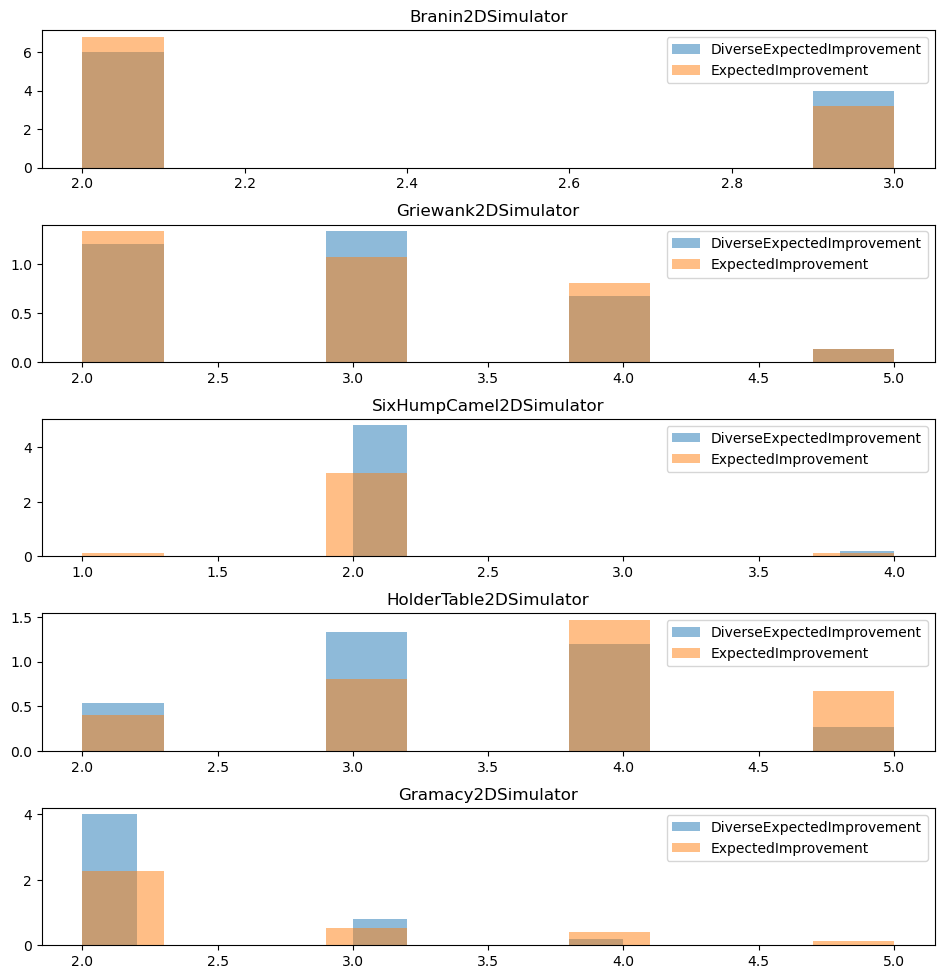

In [4]:
plotter = Plotter(experiment_list, 0.8)
plotter.plot_feature('num_cluster')

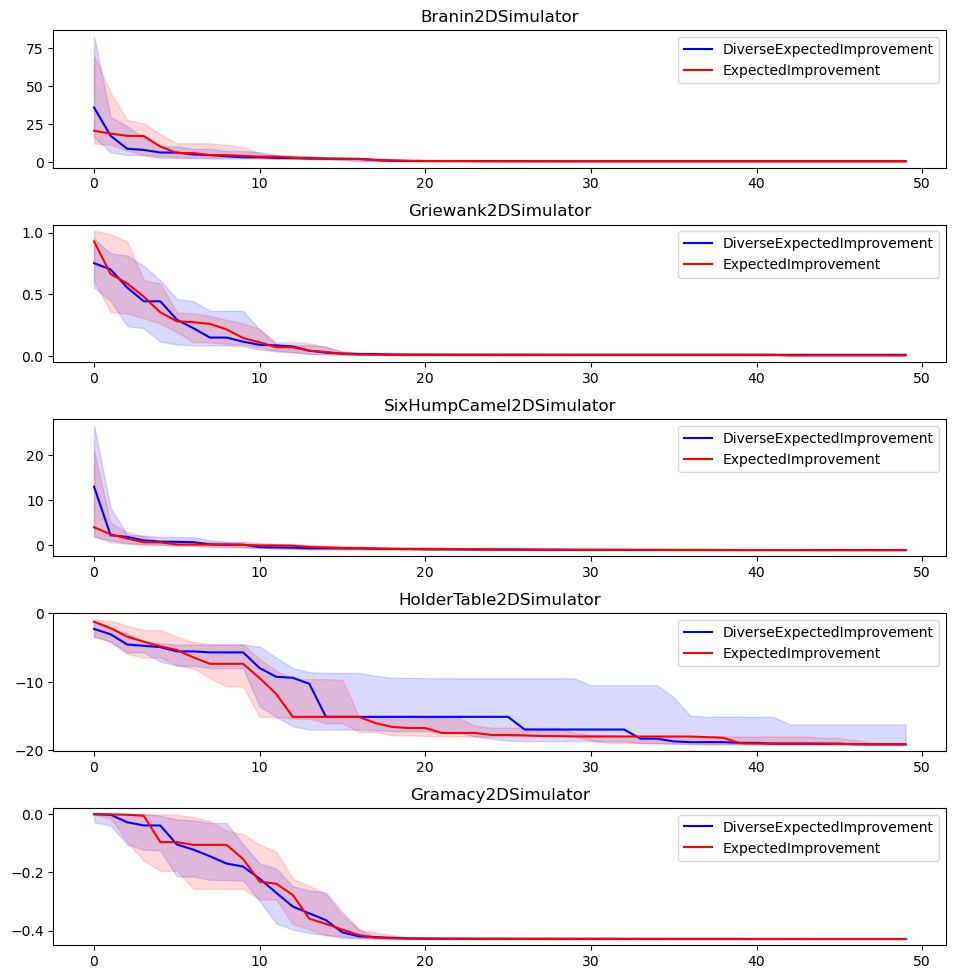

In [5]:
plotter.plot_min_sol(0)

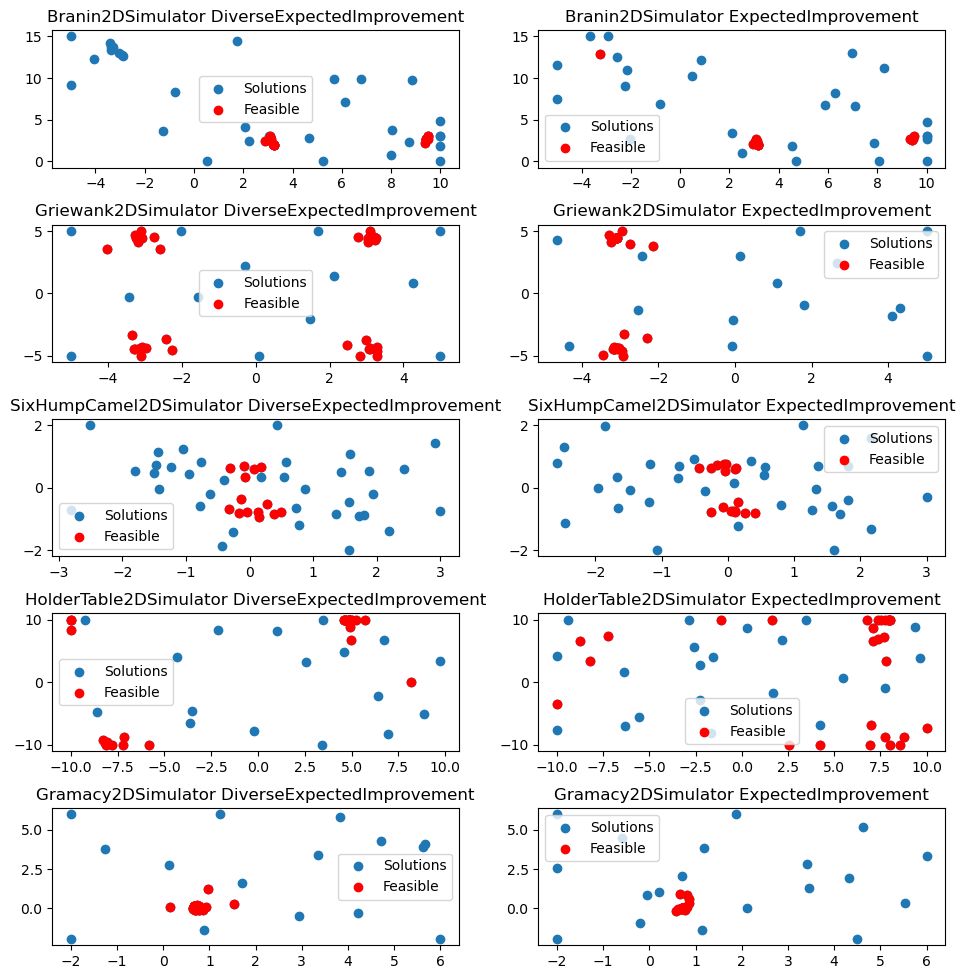

In [6]:
plotter.plot_scatter_2d(5)

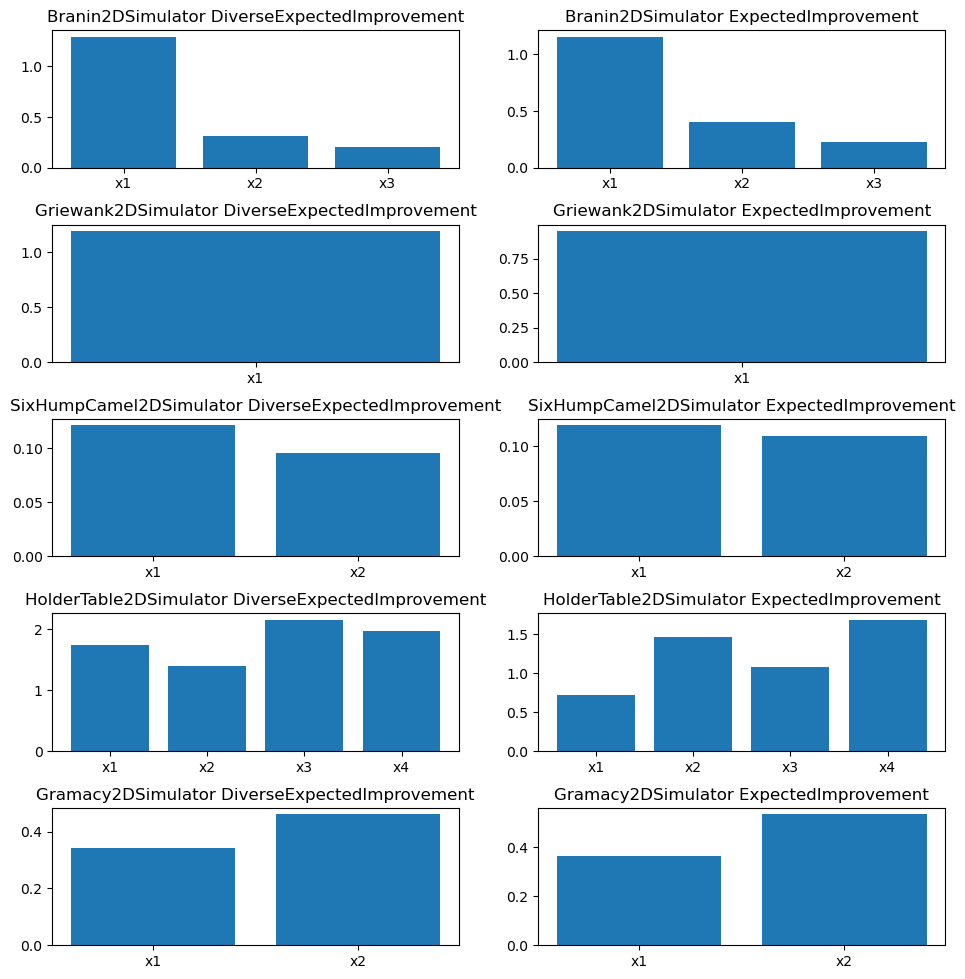

In [7]:
minima = {
    'Branin2DSimulator':[np.array([-3.14, 12.275]), np.array([3.14, 2.275]), np.array([9.42, 2.475])],
    'SixHumpCamel2DSimulator':[np.array([0.09, -0.71]), np.array([-0.09, 0.71])],
    'Griewank2DSimulator':[np.array([0, 0])],
    'Gramacy2DSimulator':[np.array([0.8, 0]), np.array([-0.8, 0])],
    'HolderTable2DSimulator':[np.array([8.05, 9.66]), np.array([-8.05, 9.66]), np.array([8.05, -9.66]), np.array([-8.05, -9.66])]
}

plotter.plot_local_minima(minima)